### Guided Practice: Logit Function and Odds

In [1]:
def logit_func(odds):
    # uses a float (odds) and returns back the log odds (logit)
    return None

def sigmoid_func(logit):
    # uses a float (logit) and returns back the probability
    return None

odds_set = [
    5./1,
    20./1,
    1.1/1,
    1.8/1,
    1.6/1
]

In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [3]:
lm = LogisticRegression()

df = pd.read_csv('../dataset/collegeadmissions.csv')

In [4]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [5]:
df = df.join(pd.get_dummies(df['rank']))

In [6]:
df.head()

,admit,gre,gpa,rank,1,2,3,4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


In [7]:
lm.fit(df[['gre', 'gpa', 1, 2, 3,]], df['admit'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
import numpy as np

In [9]:
print lm.coef_
print lm.intercept_
print df.admit.mean()

[[  1.63913356e-03   4.33354115e-04   1.15220976e+00   5.14395667e-01
   -3.62326171e-02]]
[-2.09315183]
0.3175


Below is some code to walk through confusion matrices. It'll be useful for working through the Titanic problem.

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

Below the ROC curve is based on various thresholds: it shows with a false positive rate (x-axis) ~0, it also expects a true positive rate (y-axis) ~0 (the same, ish, for the top right hand of the figure).

The second chart, which does not play with thesholds, shows the one true TPR and FPR point, joined to 0,0 and 1,1.

The first chart will be more effective as you compare models and determine where the decision line should exist for the data. The second simplifies the first in case this idea of thresholds is confusing.

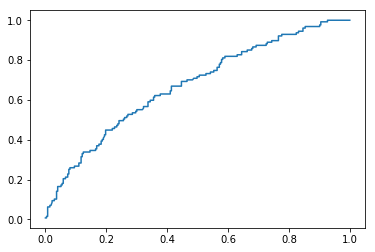

In [12]:
feature_set = df[['gre', 'gpa', 1, 2, 3,]]
actuals = lm.predict(feature_set) 
probas = lm.predict_proba(feature_set)
plt.plot(roc_curve(df[['admit']], probas[:,1])[0], roc_curve(df[['admit']], probas[:,1])[1])

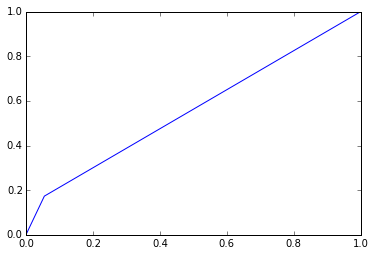

In [71]:
plt.plot(roc_curve(df[['admit']], actuals)[0], roc_curve(df[['admit']], actuals)[1])

Finally, you can use the `roc_auc_score` function to calculate the area under these curves (AUC).

In [22]:
roc_auc_score(df['admit'], probas[:,1])

0.6720746445155894

### Titanic Problem

** Goals **

1. Spend a few minutes determining which data would be most important to use in the prediction problem. You may need to create new features based on the data available. Consider using a feature selection aide in sklearn. But a worst case scenario; identify one or two strong features that would be useful to include in the model.
2. Spend 1-2 minutes considering which _metric_ makes the most sense to optimize. Accuracy? FPR or TPR? AUC? Given the business problem (understanding survival rate aboard the Titanic), why should you use this metric?
3. Build a tuned Logistic model. Be prepared to explain your design (including regularization), metric, and feature set in predicting survival using the tools necessary (such as a fit chart).

In [8]:
# load dataset
titanic_data = pd.read_csv('../dataset/titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# get categorical variable values
print "Unique sibling values:", titanic_data.SibSp.unique()
print "Unique children values:", titanic_data.Parch.unique()
print "Unique embarked:", titanic_data.Embarked.value_counts()

Unique sibling values: [1 0 3 4 2 5 8]
Unique children values: [0 1 2 5 3 4 6]
Unique embarked: S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [10]:
# decide which columns to keep in the model
cols_to_keep = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
model_data = titanic_data[cols_to_keep].copy()

In [11]:
# determine missing values
print len(model_data)
print model_data.isnull().sum()

891
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64


In [29]:
# fill missing values of Age by mean within group containing same values of each categorical variable
model_data.Age = model_data.groupby(by=["Pclass", "Sex", "SibSp", "Parch"]).transform(lambda x: x.fillna(x.mean())).Age
print model_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64


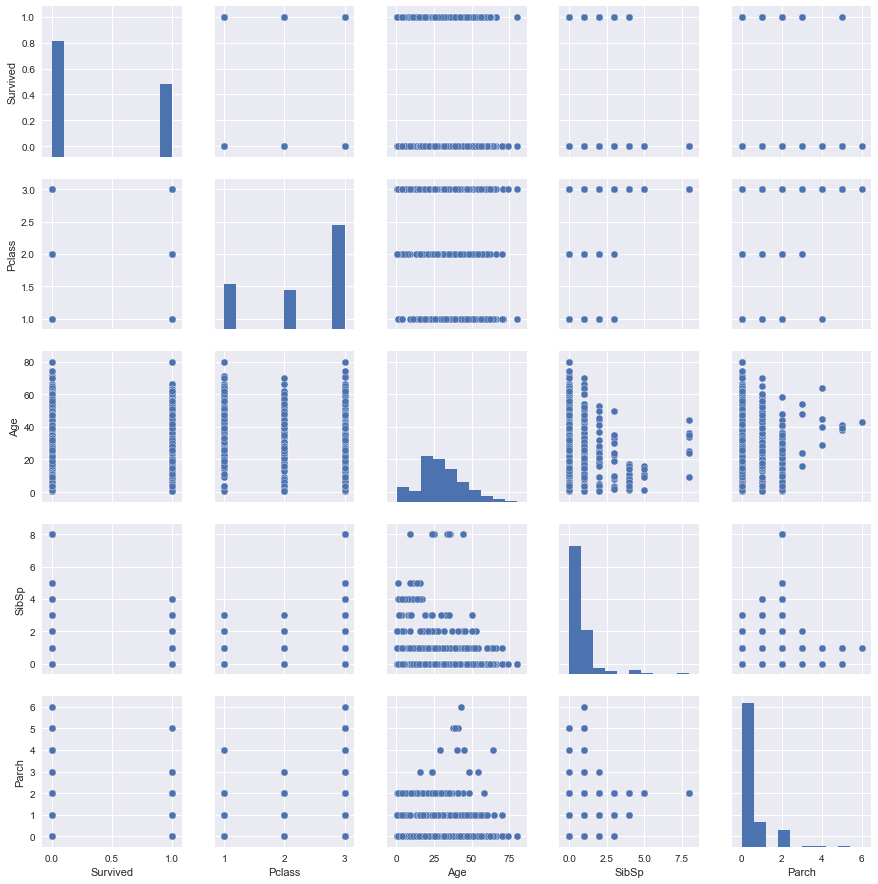

In [30]:
# generate some plots to understand relationships
import seaborn as sns
sns.pairplot(model_data)

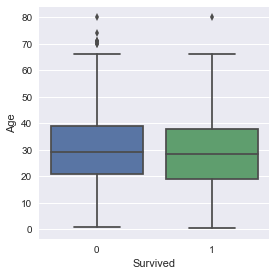

In [31]:
# is age related to survival rate?
sns.factorplot(kind='box', data=model_data, x='Survived', y='Age')

In [34]:
# what about gender, pclass?
print pd.crosstab(titanic_data.Sex, titanic_data.Survived)
print pd.crosstab(titanic_data.Pclass, titanic_data.Survived)

Survived    0    1
Sex               
female     81  233
male      468  109
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


In [35]:
# simplify categorical variables by rolling them up
model_data['isSibling'] = model_data['SibSp'].apply(lambda x: int(x > 0))
model_data['isChild'] = model_data['Parch'].apply(lambda x: int(x > 0))
model_data = pd.get_dummies(data=model_data, columns=['Sex', 'Pclass'], drop_first=True)

In [36]:
model_data.head()

,Survived,Age,SibSp,Parch,isSibling,isChild,Sex_male,Pclass_2,Pclass_3
0,0,22.0,1,0,1,0,1,0,1
1,1,38.0,1,0,1,0,0,0,0
2,1,26.0,0,0,0,0,0,0,1
3,1,35.0,1,0,1,0,0,0,0
4,0,35.0,0,0,0,0,1,0,1


In [37]:
# define model features and target variable
features_to_use = ['Age', 'isSibling', 'isChild', 'Sex_male', 'Pclass_2', 'Pclass_3']
X = model_data[features_to_use]
y = model_data.Survived

In [38]:
lm = LogisticRegression()
lm.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
print lm.score(X, y)

0.787878787879


In [40]:
probas = lm.predict_proba(X)
roc_auc_score(y, probas[:,1])

0.84691997145261455

In [95]:
print lm.coef_

[[-0.0271705  -0.13368968 -0.04443611 -2.66443847 -1.07749864 -2.2601583 ]]


In [41]:
import statsmodels.api as sm
slm = sm.Logit(endog=y, exog=sm.add_constant(X)).fit()

Optimization terminated successfully.
         Current function value: 0.454032
         Iterations 6


/Users/naumz/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [42]:
slm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Mon, 04 Dec 2017   Pseudo R-squ.:                  0.3182
Time:                        23:11:46   Log-Likelihood:                -404.54
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 1.850e-78
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4171      0.380      9.001      0.000       2.673       4.161
Age           -0.0273      0.007     -4.063      0.000      -0.040      -0.014
isSibling     -0.1344      0.203     -0.661      0.509      -0.533       0.264
isChild       -0.0444      0.225     -0.197      0.844      -0.486       0.397
Sex_male      -2.6655      0.194    -13.752      0.000      -3.045      -2.286
Pclass_2      -1.0810      0.256     -4.216      0.000      -1.584      -0.578
Pclass_3      -2.2636      0.238     -9.521      0.000      -2.730      -1.798
==============================================================================
"""

With sm.add_constant in statsmodels and C=1e12 (very large number) in sklearn, the outputs finally match!